<a href="https://colab.research.google.com/github/JensBlack/IEECR_Hackathon24/blob/main/IEECR_Hackathon_24_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install umap-learn
!pip install scanpy
!pip install dandi
!pip install --no-deps ipfx
!pip install allensdk
!pip install methodtools

!pip install neuron-morphology

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import umap

import sys

sys.path.append("../src")

In [2]:
sys.path.append("../downloads")
metadata = pd.read_csv("../downloads/20200711_patchseq_metadata_mouse.csv")
metadata.head()

,project,cell_specimen_id,cell_specimen_name,hemisphere,structure,donor_id,donor_name,biological_sex,age,ethnicity,...,apical_dendrite_status,neuron_reconstruction_type,cell_soma_normalized_depth,depth_from_pia_um,ephys_session_id,transcriptomics_sample_id,transcriptomics_batch,T-type Accession ID,T-type Label,MET-type Label
0,mIVSCC-MET,601506507,Vip-IRES-Cre;Ai14-331294.04.01.01,left,VISpm4,331294,Vip-IRES-Cre;Ai14-331294,M,P55,NaN,...,NaN,full,0.361015,NaN,601506492,PS0810_E1-50_S88,BT035,CS180626100018,Vip Gpc3 Slc18a3,Vip-MET-2
1,mIVSCC-MET,601790961,Sst-IRES-Cre;Ai14-331663.04.01.01,left,VISpm5,331663,Sst-IRES-Cre;Ai14-331663,F,P57,NaN,...,NaN,full,0.621829,NaN,601790945,PS0817_E1-50_S19,BT036,CS180626100041,Sst Tac2 Myh4,NaN
2,mIVSCC-MET,601803754,Sst-IRES-Cre;Ai14-331663.04.02.02,right,VISp2/3,331663,Sst-IRES-Cre;Ai14-331663,F,P57,NaN,...,NaN,full,0.164240,NaN,601803733,PS0817_E1-50_S25,BT036,CS180626100035,Sst Calb2 Pdlim5,Sst-MET-3
3,mIVSCC-MET,601808698,Sst-IRES-Cre;Ai14-331663.04.02.03,right,VISp5,331663,Sst-IRES-Cre;Ai14-331663,F,P57,NaN,...,NaN,full,0.483030,NaN,601808619,PS0817_E1-50_S26,BT036,CS180626100043,Sst Hpse Cbln4,Sst-MET-8
4,mIVSCC-MET,601810307,Sst-IRES-Cre;Ai14-331663.04.02.04,right,VISp2/3,331663,Sst-IRES-Cre;Ai14-331663,F,P57,NaN,...,NaN,full,0.295656,NaN,601810292,PS0817_E1-50_S27,BT036,CS180626100034,Sst Calb2 Necab1,Sst-MET-3


In [3]:
#change - file is actually an xcel
file_manifest = pd.read_excel("../downloads/2021-09-13_mouse_file_manifest.xlsx")
file_manifest.head()

,file_id,file_name,file_size,sha256_checksum,md5_checksum,technique,file_type,archive,archive_uri,project,cell_specimen_id
0,601506507,601506507.marker,268,305938ce75d55c3f43fbbe2d1d57e203139fa0c357bd73...,ecf2285ccbf5274af7d6a31a855ce950,morphology,marker_swc,BIL,ftp://download.brainlib.org:8811/biccn/zeng/ps...,mIVSCC-MET,601506507.0
1,601506507,601506507_raw.swc,160503,6c82f5f974e4f6d2336a3606d4955823edd3c0173da60d...,7cc7ccdd627ef83fe54fcbf0feac79c2,morphology,raw_swc,BIL,ftp://download.brainlib.org:8811/biccn/zeng/ps...,mIVSCC-MET,601506507.0
2,601506507,601506507_transformed.swc,271764,bad13a99c8f7f8a375e43109d80fd23d7028555a7dc42b...,f6a365d86ff65370af26439f0f16caaf,morphology,transformed_swc,BIL,ftp://download.brainlib.org:8811/biccn/zeng/ps...,mIVSCC-MET,601506507.0
3,601506492,sub-599387254_ses-601506492_icephys.nwb,17881801,54003c5b599fa8081938713e8c7c3b69d1883b31b3ada1...,d854a21668f5f2229024d8cf0975de54,intracellular_electrophysiology,nwb,DANDI,https://api.dandiarchive.org/api/assets/e734ba...,mIVSCC-MET,601506507.0
4,609481756,PS0810_E1-50_GCTCATGA-TCTCTCCG_R2.fastq.gz,48014090,a2954fc88cb34bc30b9bca9e9f1a0cff2c9b53cf9a7268...,fc9441d44f1fab3e5b31cbb2c57228b0,transcriptomics,reverse_fastq,NEMO,http://data.nemoarchive.org/other/AIBS/AIBS_pa...,mIVSCC-MET,601506507.0


In [4]:
gene_data = pd.read_csv(
    "../downloads/20200513_Mouse_PatchSeq_Release_cpm.v2.csv",
    index_col=0
)
gene_data

,PS0810_E1-50_S88,PS0817_E1-50_S19,PS0817_E1-50_S25,PS0817_E1-50_S26,PS0817_E1-50_S27,PS0817_E1-50_S28,PS0817_E1-50_S46,PS0817_E1-50_S52,PS0830_E1-50_S17,PS0830_E1-50_S19,...,SM-J39ZH_S561_E1-50,SM-J39ZH_S562_E1-50,SM-J39ZH_S565_E1-50,SM-J39ZH_S566_E1-50,SM-J39ZH_S571_E1-50,SM-J39ZH_S576_E1-50,SM-J3A1L_S592_E1-50,SM-J3A1L_S593_E1-50,SM-J3A1L_S603_E1-50,SM-J3A1L_S604_E1-50
0610005C13Rik,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0610006L08Rik,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0610007P14Rik,0.0,0.0,0.000000,152.239614,165.312294,58.189895,0.000000,0.000000,551.71563,109.361330,...,0.000000,0.0,32.223984,0.00000,24.467996,0.000000,51.366477,91.617703,82.706145,116.083588
0610009B22Rik,0.0,0.0,69.658825,0.000000,0.000000,0.000000,0.000000,57.335504,0.00000,78.641855,...,52.858114,0.0,27.620558,27.46475,40.197422,70.429453,0.000000,0.000000,0.000000,111.937746
0610009E02Rik,0.0,0.0,0.000000,0.000000,0.000000,1.662568,33.786897,0.000000,0.00000,0.000000,...,0.000000,0.0,20.715418,0.00000,1.747714,0.000000,0.000000,31.342899,0.000000,103.646061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n-R5s142,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
n-R5s143,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
n-R5s144,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
n-R5s146,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
from generate_select_markers import generate_SelectMarkers, generate_gene_umap
generate_SelectMarkers(gene_data, metadata)

marker_genes_for_umap = generate_gene_umap(gene_data)


c:\anaconda3\Lib\site-packages\scanpy\preprocessing\_simple.py:405: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
c:\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
c:\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
c:\anaconda3\Lib\site-pack

In [6]:

# Proceed with UMAP embedding
embedding = umap.UMAP(n_neighbors=25).fit_transform(
    np.log2(gene_data.loc[marker_genes_for_umap, :].values.T + 1)
)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

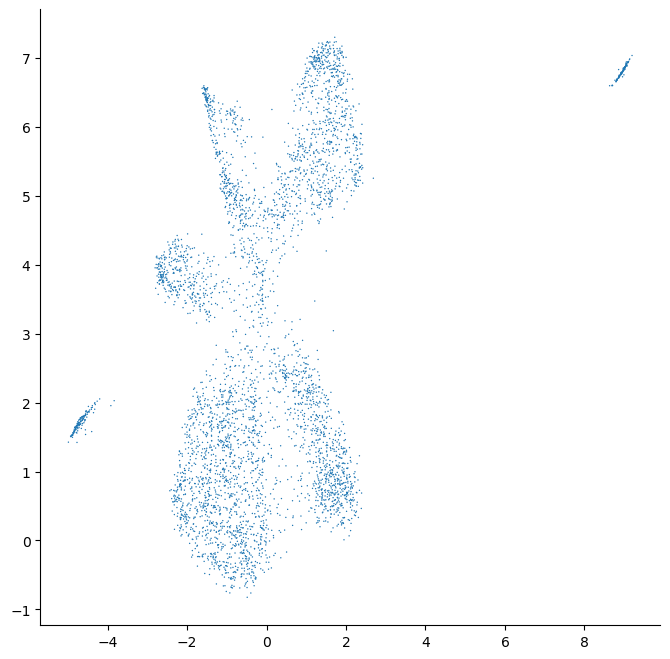

In [8]:
plt.figure(figsize=(8, 8))
plt.scatter(*embedding.T, s=1, edgecolor="none")
sns.despine()

In [9]:
# Identify the cells from a particular t-type (Lamp5 Plch2 Dock5)
my_ttype_metadata = metadata.loc[metadata["T-type Label"] == "Lamp5 Plch2 Dock5", :]

my_ttype_metadata

,project,cell_specimen_id,cell_specimen_name,hemisphere,structure,donor_id,donor_name,biological_sex,age,ethnicity,...,apical_dendrite_status,neuron_reconstruction_type,cell_soma_normalized_depth,depth_from_pia_um,ephys_session_id,transcriptomics_sample_id,transcriptomics_batch,T-type Accession ID,T-type Label,MET-type Label
SM-GE4QD_S015_E1-50,mIVSCC-MET,640319052,Oxtr-T2A-Cre;Ai14-351472.04.01.02,left,VISp1,351472,Oxtr-T2A-Cre;Ai14-351472,F,P49,NaN,...,NaN,NaN,NaN,NaN,640318956,SM-GE65C_S142_E1-50,RSC-126,CS180626100005,Lamp5 Plch2 Dock5,NaN
SM-GE4QD_S036_E1-50,mIVSCC-MET,642442513,Ndnf-IRES2-dgCre;Ai14-353735.03.02.01,right,VISp1,353735,Ndnf-IRES2-dgCre;Ai14-353735,M,P39,NaN,...,NaN,NaN,NaN,NaN,642442471,SM-GE65C_S188_E1-50,RSC-126,CS180626100005,Lamp5 Plch2 Dock5,NaN
SM-GE4QD_S041_E1-50,mIVSCC-MET,642496703,Gad2-IRES-Cre;Ai14-352686.03.02.01,right,VISp1,352686,Gad2-IRES-Cre;Ai14-352686,M,P45,NaN,...,NaN,NaN,NaN,NaN,642496688,SM-GE65C_S189_E1-50,RSC-126,CS180626100005,Lamp5 Plch2 Dock5,NaN
SM-GE4QD_S068_E1-50,mIVSCC-MET,642833509,Ndnf-IRES2-dgCre;Ai14-353737.04.02.01,right,VISp1,353737,Ndnf-IRES2-dgCre;Ai14-353737,M,P40,NaN,...,NaN,NaN,NaN,NaN,642833493,SM-GE652_S154_E1-50,RSC-127,CS180626100005,Lamp5 Plch2 Dock5,NaN
SM-GE4QF_S004_E1-50,mIVSCC-MET,642842839,Ndnf-IRES2-dgCre;Ai14-353737.04.01.01,left,VISp2/3,353737,Ndnf-IRES2-dgCre;Ai14-353737,M,P40,NaN,...,NaN,NaN,NaN,NaN,642842794,SM-GE652_S164_E1-50,RSC-127,CS180626100005,Lamp5 Plch2 Dock5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SM-GE953_S013_E1-50,mIVSCC-MET,891514933,Ndnf-IRES2-dgCre;Ai14-470196.04.01.02,left,VISp1,470196,Ndnf-IRES2-dgCre;Ai14-470196,F,P55,NaN,...,NaN,NaN,NaN,NaN,891514675,SM-GE4Y5_S168_E1-50,RSC-217,CS180626100005,Lamp5 Plch2 Dock5,NaN
SM-GE953_S018_E1-50,mIVSCC-MET,891652412,Ndnf-IRES2-dgCre;Ai14-470196.03.01.02,left,VISp1,470196,Ndnf-IRES2-dgCre;Ai14-470196,F,P55,NaN,...,NaN,NaN,NaN,NaN,891651975,SM-GE4Y5_S184_E1-50,RSC-217,CS180626100005,Lamp5 Plch2 Dock5,NaN
SM-GE953_S019_E1-50,mIVSCC-MET,891664096,Ndnf-IRES2-dgCre;Ai14-470196.05.01.01,left,VISp2/3,470196,Ndnf-IRES2-dgCre;Ai14-470196,F,P55,NaN,...,NaN,NaN,NaN,NaN,891663833,SM-GE4Y5_S179_E1-50,RSC-217,CS180626100005,Lamp5 Plch2 Dock5,NaN
SM-GE95A_S026_E1-50,mIVSCC-MET,901179274,Gad2-IRES-Cre;Ai14-473098.03.01.02,left,VISp2/3,473098,Gad2-IRES-Cre;Ai14-473098,F,P56,NaN,...,NaN,NaN,NaN,NaN,901178941,SM-GE4WN_S087_E1-50,RSC-219,CS180626100005,Lamp5 Plch2 Dock5,NaN


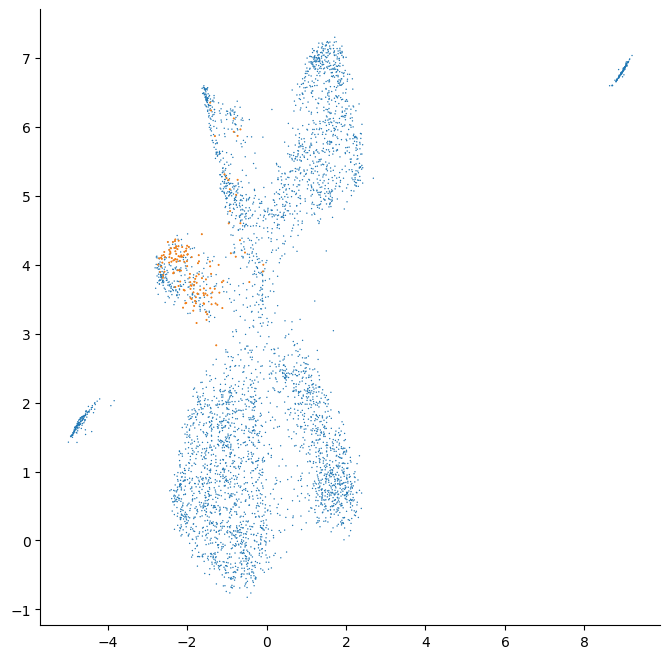

In [10]:
my_ttype_mask = gene_data.columns.isin(my_ttype_metadata["transcriptomics_sample_id"].tolist())

plt.figure(figsize=(8, 8))
plt.scatter(*embedding.T, s=1, edgecolor="none")
plt.scatter(*embedding[my_ttype_mask, :].T, s=2, edgecolor="none")
sns.despine()

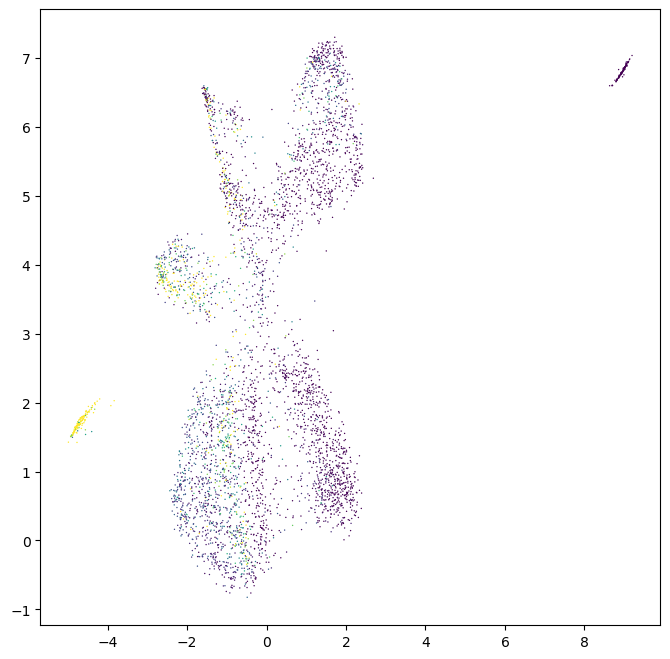

In [11]:
plt.figure(figsize=(8, 8))
plt.scatter(
    *embedding.T,
    s=1,
    c=gene_data.loc["Npy", :].values,
    vmin=0,
    vmax=5e3,
    cmap="viridis",
    edgecolor="none"
)

In [12]:
my_ttype_with_recon_metadata = metadata.loc[
    (metadata["T-type Label"] == "Lamp5 Plch2 Dock5") &
    (metadata["neuron_reconstruction_type"].isin(["full"])),
    :]

In [13]:
my_ttype_with_recon_metadata.iloc[0, :]

project                                                  mIVSCC-MET
cell_specimen_id                                          645169930
cell_specimen_name            Ndnf-IRES2-dgCre;Ai14-355228.04.01.01
hemisphere                                                     left
structure                                                     VISp1
donor_id                                                     355228
donor_name                             Ndnf-IRES2-dgCre;Ai14-355228
biological_sex                                                    F
age                                                             P49
ethnicity                                                       NaN
medical_conditions                                              NaN
full_genotype                  Ndnf-IRES2-dgCre/wt;Ai14(RCL-tdT)/wt
dendrite_type                                                aspiny
apical_dendrite_status                                          NaN
neuron_reconstruction_type                      

In [14]:
my_specimen_id = my_ttype_with_recon_metadata.iloc[0, :]["cell_specimen_id"]

nwb_urls = file_manifest.loc[
    (file_manifest["cell_specimen_id"] == float(my_specimen_id)) &
    (file_manifest["file_type"] == "nwb"),
    :
]

In [15]:
nwb_urls["archive_uri"].values[0]

'https://api.dandiarchive.org/api/assets/5a0d8719-3b7c-41f7-b235-3640d3f242e7/download/'

In [16]:
!dandi download https://api.dandiarchive.org/api/assets/5a0d8719-3b7c-41f7-b235-3640d3f242e7/download/

PATH                                    SIZE     DONE    DONE% CHECKSUM STATUS  MESSAGE          
sub-643830424_ses-645169915_icephys.nwb                                 error   FileExistsError  
Summary:                                0 Bytes  0 Bytes                1 error 1 FileExistsError
                                        +15.1 MB 0.00%                                           


2024-08-28 20:46:14,051 [    INFO] Logs saved in C:\Users\Tony Kelly\AppData\Local\dandi\dandi-cli\Logs\2024.08.28-18.46.11Z-7472.log


In [18]:
nwb_path = nwb_urls["file_name"].values[0]
nwb_path

'sub-643830424_ses-645169915_icephys.nwb'

In [19]:
from ipfx.dataset.create import create_ephys_data_set
from ipfx.data_set_features import extract_data_set_features
from ipfx.utilities import drop_failed_sweeps

data_set = create_ephys_data_set(nwb_file=nwb_path)
drop_failed_sweeps(data_set)
cell_features, sweep_features, cell_record, sweep_records, _, _ = \
    extract_data_set_features(data_set, subthresh_min_amp=-100.0)

c:\anaconda3\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
c:\anaconda3\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.7.0 is already loaded.
  return func(args[0], **pargs)


In [20]:
cell_features.keys()

dict_keys(['long_squares', 'short_squares', 'ramps'])

In [21]:
cell_features["long_squares"].keys()

dict_keys(['sweeps', 'v_baseline', 'rheobase_i', 'rheobase_sweep', 'spiking_sweeps', 'fi_fit_slope', 'hero_sweep', 'sag', 'vm_for_sag', 'subthreshold_sweeps', 'subthreshold_membrane_property_sweeps', 'input_resistance', 'tau'])

In [22]:
cell_features["long_squares"]["rheobase_sweep"]

{'avg_rate': 5.000000000000001,
 'peak_deflect': (19.000002, 93400),
 'stim_amp': 260.0,
 'v_baseline': -69.02718353271484,
 'sag': -9.049047470092773,
 'adapt': -0.08286998815056433,
 'latency': 0.5081,
 'isi_cv': 0.3435623028567409,
 'mean_isi': 0.11080499999999999,
 'median_isi': 0.09931000000000001,
 'first_isi': 0.1734199999999999,
 'index': 4,
 'spikes': [{'threshold_index': 76405,
   'clipped': False,
   'threshold_t': 1.0081,
   'threshold_v': -30.875001907348633,
   'threshold_i': 260.0,
   'peak_index': 76432,
   'peak_t': 1.00864,
   'peak_v': 18.875001907348633,
   'peak_i': 260.0,
   'trough_index': 76720,
   'trough_t': 1.0144,
   'trough_v': -46.937503814697266,
   'trough_i': 260.0,
   'upstroke_index': 76420,
   'upstroke': 195.88039484902075,
   'upstroke_t': 1.0084,
   'upstroke_v': -5.031250476837158,
   'downstroke_index': 76452,
   'downstroke': -60.15510090071539,
   'downstroke_t': 1.00904,
   'downstroke_v': 2.718750238418579,
   'isi_type': 'detour',
   'fast_

In [23]:
cell_features["long_squares"]["rheobase_sweep"]["latency"]
df=cell_features["long_squares"]

In [24]:
swp = data_set.sweep(cell_features["long_squares"]["rheobase_sweep"]["sweep_number"])

swp = data_set.sweep(10)

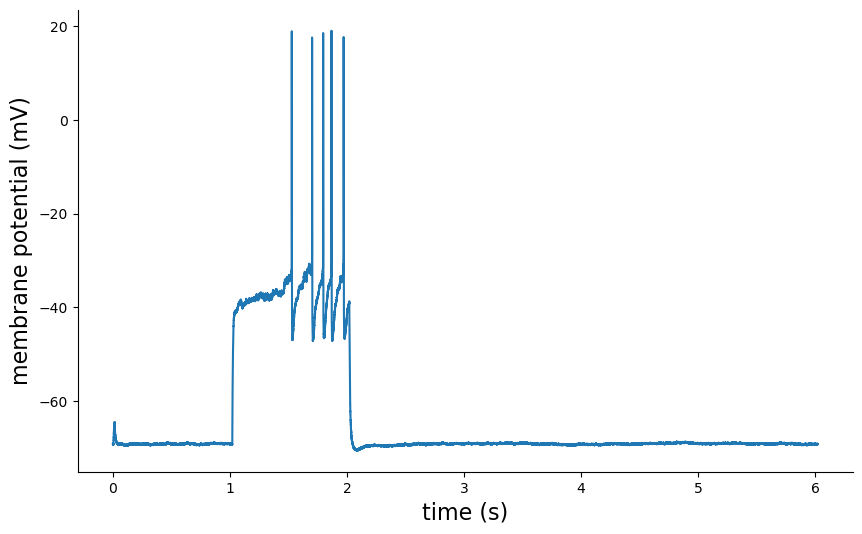

In [25]:
plt.figure(figsize=(10, 6))

plt.plot(swp.t, swp.v)
plt.xlabel("time (s)", fontsize=16)
plt.ylabel("membrane potential (mV)", fontsize=16)
sns.despine()

Morphology
Now we'll get the SWC file that has the morphological reconstruction of this cell and use the neuron_morphology library to process it.

In [26]:
swc_urls = file_manifest.loc[
    (file_manifest["cell_specimen_id"] == float(my_specimen_id)) &
    (file_manifest["file_type"] == "transformed_swc"),
    :
]

In [32]:
swc_urls["archive_uri"].values[0]

'ftp://download.brainlib.org:8811/biccn/zeng/pseq/morph/200526/645169930_transformed.swc'

In [31]:
!wget ftp://download.brainlib.org:8811/biccn/zeng/pseq/morph/200526/645169930_transformed.swc

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [33]:
swc_path = swc_urls["file_name"].values[0]
swc_path

'645169930_transformed.swc'

In [34]:
from neuron_morphology.swc_io import morphology_from_swc
from neuron_morphology.constants import AXON, BASAL_DENDRITE, SOMA

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
ipfx 1.0.8 requires dictdiffer, which is not installed.
ipfx 1.0.8 requires pyabf<2.3.0, which is not installed.
datasets 2.12.0 requires dill<0.3.7,>=0.3.0, but you have dill 0.3.8 which is incompatible.
hdmf-zarr 0.8.0 requires numpy<2.0,>=1.24, but you have numpy 1.23.5 which is incompatible.
ipfx 1.0.8 requires argschema<2.0.0, but you have argschema 3.0.4 which is incompatible.
ipfx 1.0.8 requires h5py==2.10.0, but you have h5py 3.9.0 which is incompatible.
ipfx 1.0.8 requires marshmallow==3.0.0rc6, but you have marshmallow 3.22.0 which is incompatible.
ipfx 1.0.8 requires numpy<1.19.0,>=1.15.4, but you have numpy 1.23.5 which is incompatible.
ipfx 1.0.8 requires pandas<=0.25

  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl.metadata (58 kB)
   ---------------------------------------- 0.0/972.2 kB ? eta -:--:--
   --------------------- ------------------ 524.3/972.2 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 972.2/972.2 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------- ----------------------- 0.5/1.3 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 3.9 MB/s eta 0:00:00
Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
  Attempting uninstall: greenlet
    Found 

In [35]:
morph = morphology_from_swc(swc_path)

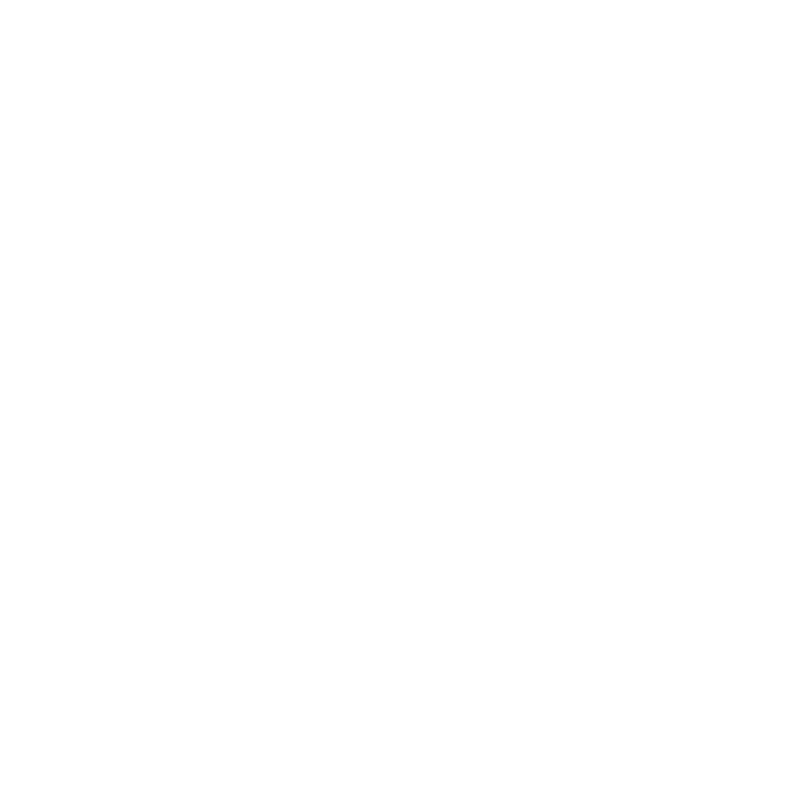

In [36]:
axon_nodes = morph.get_node_by_types([AXON])
dend_nodes = morph.get_node_by_types([BASAL_DENDRITE])
soma_nodes = morph.get_node_by_types([SOMA])

axon_x = [node['x'] for node in axon_nodes]
axon_y = [node['y'] for node in axon_nodes]

dend_x = [node['x'] for node in dend_nodes]
dend_y = [node['y'] for node in dend_nodes]

soma_x = [node['x'] for node in soma_nodes]
soma_y = [node['y'] for node in soma_nodes]


plt.figure(figsize=(10, 10))

plt.scatter(axon_x, axon_y, s=1, edgecolor="none")
plt.scatter(dend_x, dend_y, s=1, edgecolor="none")
plt.scatter(soma_x, soma_y, s=20, c="black", edgecolor="none")


plt.gca().set(xticks=[], yticks=[])
plt.gca().set_aspect("equal")
sns.despine(left=True, bottom=True)

In [ ]:
from neuron_morphology.feature_extractor.data import Data
from neuron_morphology.feature_extractor.feature_extractor import FeatureExtractor
from neuron_morphology.features.default_features import default_features

fe = FeatureExtractor()
fe.register_features(default_features)
feature_extraction_run = fe.extract(Data(morph))

In [ ]:
feature_extraction_run.results

In [ ]:
width = feature_extraction_run.results["axon.node.dimension"]["width"]
height = feature_extraction_run.results["axon.node.dimension"]["height"]
wh_ratio = width / height
print(width, height, wh_ratio)